<a href="https://colab.research.google.com/github/doldolMac/homework_CV/blob/master/CV_HW_%EC%A0%84%ED%9D%A5%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW

Cloning into 'homework_CV'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 68 (delta 2), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (68/68), done.
homework_CV  sample_data
240 180


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log10


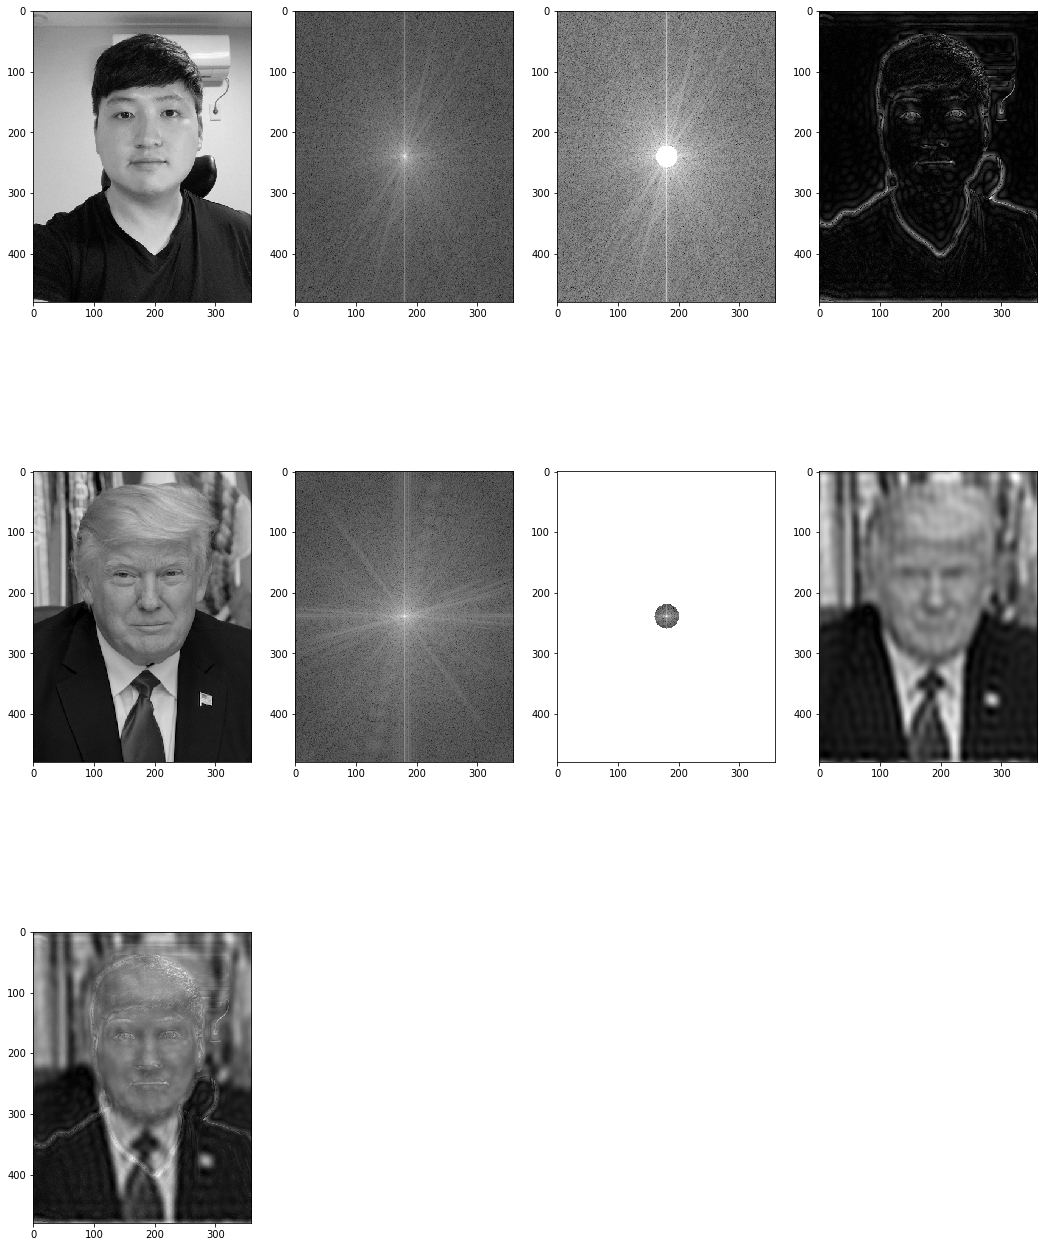

In [1]:
#! git clone https://github.com/doldolMac/homework_CV

! git clone https://github.com/doldolMac/homework_CV.git

!ls

from PIL import Image
import numpy as np
import scipy
from skimage import io
from matplotlib import pyplot as plt


M_img = Image.open("/content/homework_CV/D.Trump.jpg").convert('L')

T_img = Image.open("/content/homework_CV/me2.jpeg").convert('L')


T_img = T_img.resize((360, 480))

M_img = M_img.resize((360, 480))

T_ft_img = np.fft.fft2(T_img)
T_shft_img = np.fft.fftshift(T_ft_img)
T_fil_shft_img = np.fft.fftshift(T_ft_img)
#T_fil_shft_img2 = np.fft.fftshift(T_ft_img)
T_abs_img = abs(T_shft_img)
T_ft_mag = np.log10(T_abs_img)
T_fil_ft_mag = np.log10(T_abs_img)

M_ft_img = np.fft.fft2(M_img)
M_shft_img = np.fft.fftshift(M_ft_img)
M_fil_shft_img = np.fft.fftshift(M_ft_img)
M_fil_shft_img2 = np.fft.fftshift(M_ft_img)
M_abs_img = abs(M_shft_img)
M_ft_mag = np.log10(M_abs_img)
M_fil_ft_mag = np.log10(M_abs_img)


T_info_img = T_img.size
T_cols, T_rows = T_info_img
T_center_rows = int(T_rows/2)
T_center_cols = int(T_cols/2)

print(T_center_rows, T_center_cols)

M_info_img = M_img.size
M_cols, M_rows = M_info_img
M_center_rows = int(M_rows/2)
M_center_cols = int(M_cols/2)

#T_fil_shft_img[T_center_rows-20:T_center_rows+20, T_center_cols-20:T_center_cols+20]=0

#M_fil_shft_img[M_center_rows-20:M_center_rows+20, M_center_cols-20:M_center_cols+20]=0

#T_fil_shft_img =  T_fil_shft_img2 - T_fil_shft_img
#M_fil_shft_img =  M_fil_shft_img2 - M_fil_shft_img

# Circular LPF mask, center circle is 1, remaining all zeros

L_mask = np.zeros((M_rows, M_cols), np.uint8)
L_r = 20
M_center = [M_center_rows, M_center_cols]
M_x, M_y = np.ogrid[:M_rows, :M_cols]
L_mask_area = (M_x - M_center[0]) ** 2 + (M_y - M_center[1]) ** 2 <=L_r*L_r
L_mask[L_mask_area] = 1

H_mask = np.ones((T_rows, T_cols), np.uint8)
H_r = 18
T_center = [T_center_rows, T_center_cols]
T_x, T_y = np.ogrid[:T_rows, :T_cols]
H_mask_area = (T_x - T_center[0]) ** 2 + (T_y - T_center[1]) ** 2 <=H_r*H_r
H_mask[H_mask_area] = 0

T_fil_shft_img = T_fil_shft_img * H_mask
M_fil_shft_img = M_fil_shft_img * L_mask

T_abs_fil_high = abs(T_fil_shft_img)
T_mag_fil_high = np.log10(T_abs_fil_high)

M_abs_fil_high = abs(M_fil_shft_img)
M_mag_fil_high = np.log10(M_abs_fil_high)

T_inv_ft_shft = np.fft.ifftshift(T_fil_shft_img)
T_inv_ft_img = np.fft.ifft2(T_inv_ft_shft)
T_abs_inv_ft_img = abs(T_inv_ft_img)

M_inv_ft_shft = np.fft.ifftshift(M_fil_shft_img)
M_inv_ft_img = np.fft.ifft2(M_inv_ft_shft)
M_abs_inv_ft_img = abs(M_inv_ft_img)

Superposition = abs(T_inv_ft_img) + abs(M_inv_ft_img)


fig = plt.figure(figsize=(18,24))
plt.subplot(341)
plt.imshow(T_img, cmap = 'gray')
plt.subplot(342)
plt.imshow(T_ft_mag, cmap = 'gray')
plt.subplot(343)
plt.imshow(T_mag_fil_high, cmap = 'gray')
plt.subplot(344)
plt.imshow(T_abs_inv_ft_img, cmap = 'gray')
plt.subplot(345)
plt.imshow(M_img, cmap = 'gray')
plt.subplot(346)
plt.imshow(M_ft_mag, cmap = 'gray')
plt.subplot(347)
plt.imshow(M_mag_fil_high, cmap = 'gray')
plt.subplot(348)
plt.imshow(M_abs_inv_ft_img, cmap = 'gray')
plt.subplot(349)
plt.imshow(Superposition, cmap = 'gray')

plt.show()

HW

fatal: destination path 'homework_CV' already exists and is not an empty directory.
240 180


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10


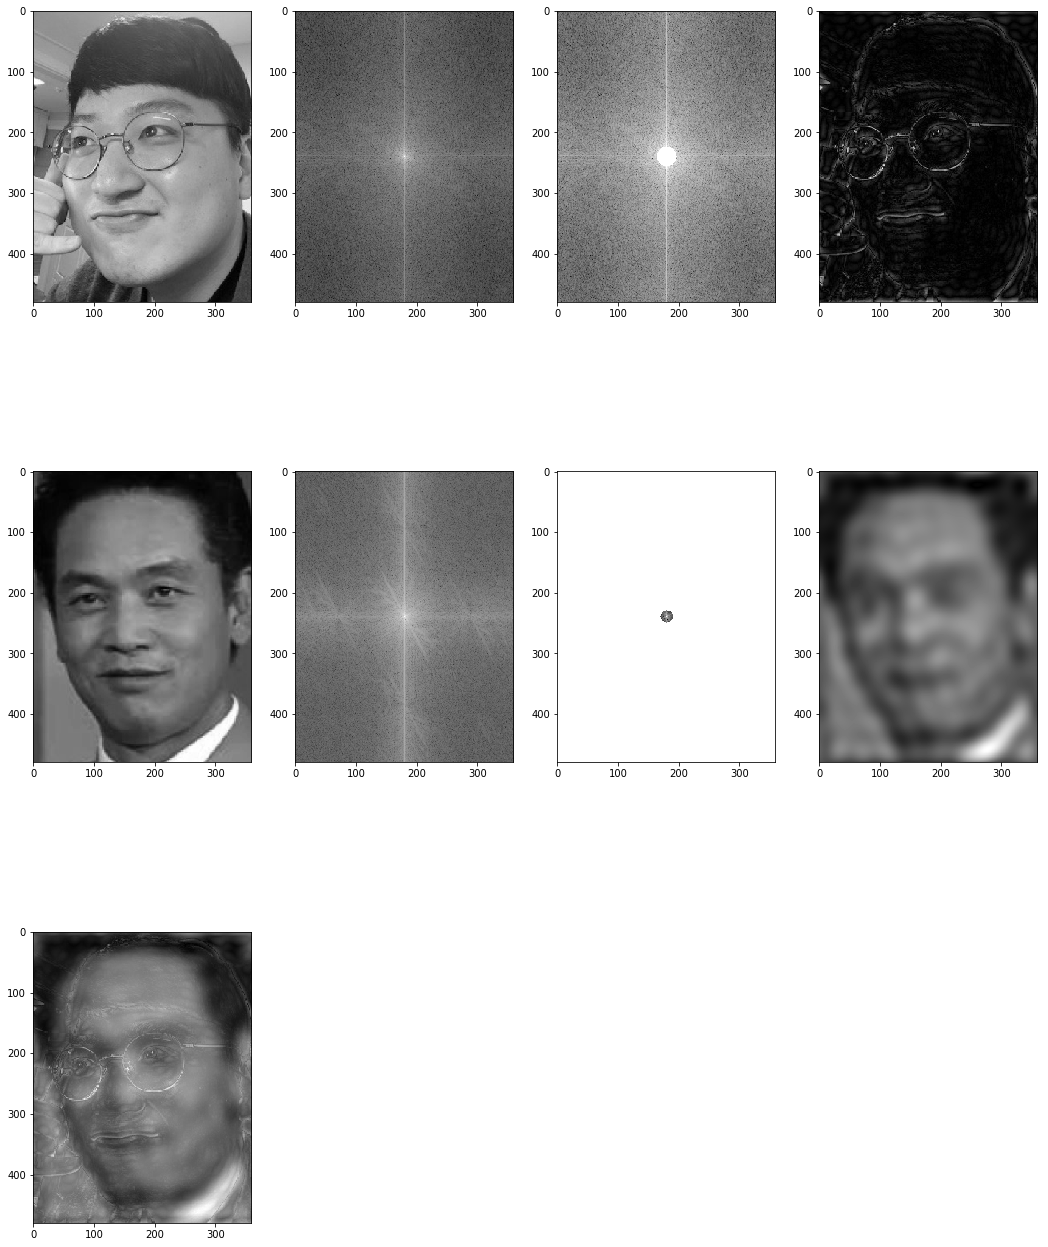

In [2]:
! git clone https://github.com/doldolMac/homework_CV.git

from PIL import Image
import numpy as np
import scipy
from skimage import io
from matplotlib import pyplot as plt


M_img = Image.open("/content/homework_CV/KYC.png").convert('L')

T_img = Image.open("/content/homework_CV/me3.jpeg").convert('L')


T_img = T_img.resize((360, 480))

M_img = M_img.resize((360, 480))

T_ft_img = np.fft.fft2(T_img)
T_shft_img = np.fft.fftshift(T_ft_img)
T_fil_shft_img = np.fft.fftshift(T_ft_img)
#T_fil_shft_img2 = np.fft.fftshift(T_ft_img)
T_abs_img = abs(T_shft_img)
T_ft_mag = np.log10(T_abs_img)
T_fil_ft_mag = np.log10(T_abs_img)

M_ft_img = np.fft.fft2(M_img)
M_shft_img = np.fft.fftshift(M_ft_img)
M_fil_shft_img = np.fft.fftshift(M_ft_img)
M_fil_shft_img2 = np.fft.fftshift(M_ft_img)
M_abs_img = abs(M_shft_img)
M_ft_mag = np.log10(M_abs_img)
M_fil_ft_mag = np.log10(M_abs_img)


T_info_img = T_img.size
T_cols, T_rows = T_info_img
T_center_rows = int(T_rows/2)
T_center_cols = int(T_cols/2)

print(T_center_rows, T_center_cols)

M_info_img = M_img.size
M_cols, M_rows = M_info_img
M_center_rows = int(M_rows/2)
M_center_cols = int(M_cols/2)

L_mask = np.zeros((M_rows, M_cols), np.uint8)
L_r = 10
M_center = [M_center_rows, M_center_cols]
M_x, M_y = np.ogrid[:M_rows, :M_cols]
L_mask_area = (M_x - M_center[0]) ** 2 + (M_y - M_center[1]) ** 2 <=L_r*L_r
L_mask[L_mask_area] = 1

H_mask = np.ones((T_rows, T_cols), np.uint8)
H_r = 16
T_center = [T_center_rows, T_center_cols]
T_x, T_y = np.ogrid[:T_rows, :T_cols]
H_mask_area = (T_x - T_center[0]) ** 2 + (T_y - T_center[1]) ** 2 <=H_r*H_r
H_mask[H_mask_area] = 0

T_fil_shft_img = T_fil_shft_img * H_mask
M_fil_shft_img = M_fil_shft_img * L_mask

T_abs_fil_high = abs(T_fil_shft_img)
T_mag_fil_high = np.log10(T_abs_fil_high)

M_abs_fil_high = abs(M_fil_shft_img)
M_mag_fil_high = np.log10(M_abs_fil_high)

T_inv_ft_shft = np.fft.ifftshift(T_fil_shft_img)
T_inv_ft_img = np.fft.ifft2(T_inv_ft_shft)
T_abs_inv_ft_img = abs(T_inv_ft_img)

M_inv_ft_shft = np.fft.ifftshift(M_fil_shft_img)
M_inv_ft_img = np.fft.ifft2(M_inv_ft_shft)
M_abs_inv_ft_img = abs(M_inv_ft_img)

Superposition = abs(T_inv_ft_img) + abs(M_inv_ft_img)


fig = plt.figure(figsize=(18,24))
plt.subplot(341)
plt.imshow(T_img, cmap = 'gray')
plt.subplot(342)
plt.imshow(T_ft_mag, cmap = 'gray')
plt.subplot(343)
plt.imshow(T_mag_fil_high, cmap = 'gray')
plt.subplot(344)
plt.imshow(T_abs_inv_ft_img, cmap = 'gray')
plt.subplot(345)
plt.imshow(M_img, cmap = 'gray')
plt.subplot(346)
plt.imshow(M_ft_mag, cmap = 'gray')
plt.subplot(347)
plt.imshow(M_mag_fil_high, cmap = 'gray')
plt.subplot(348)
plt.imshow(M_abs_inv_ft_img, cmap = 'gray')
plt.subplot(349)
plt.imshow(Superposition, cmap = 'gray')

plt.show()